In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel(r"./Ml_data_V5.xlsx")
df

,Electrolyte,Electrolyte\ncocentration,Voltage_V,Current density_mA/cm2,Power density_mW/cm2
0,NaOH,0.5,1.569561,0.000000,0.000000
1,NaOH,0.5,1.569485,0.000084,0.000132
2,NaOH,0.5,1.560197,0.252290,0.393623
3,NaOH,0.5,1.543219,0.420464,0.648867
4,NaOH,0.5,1.527831,0.529140,0.808436
...,...,...,...,...,...
1793,KOH,5.0,0.149050,131.910697,19.661293
1794,KOH,5.0,0.133633,133.120901,17.789370
1795,KOH,5.0,0.118231,134.708175,15.926732
1796,KOH,5.0,0.105275,134.769087,14.187863


d:\MyProjects\Power estimator\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


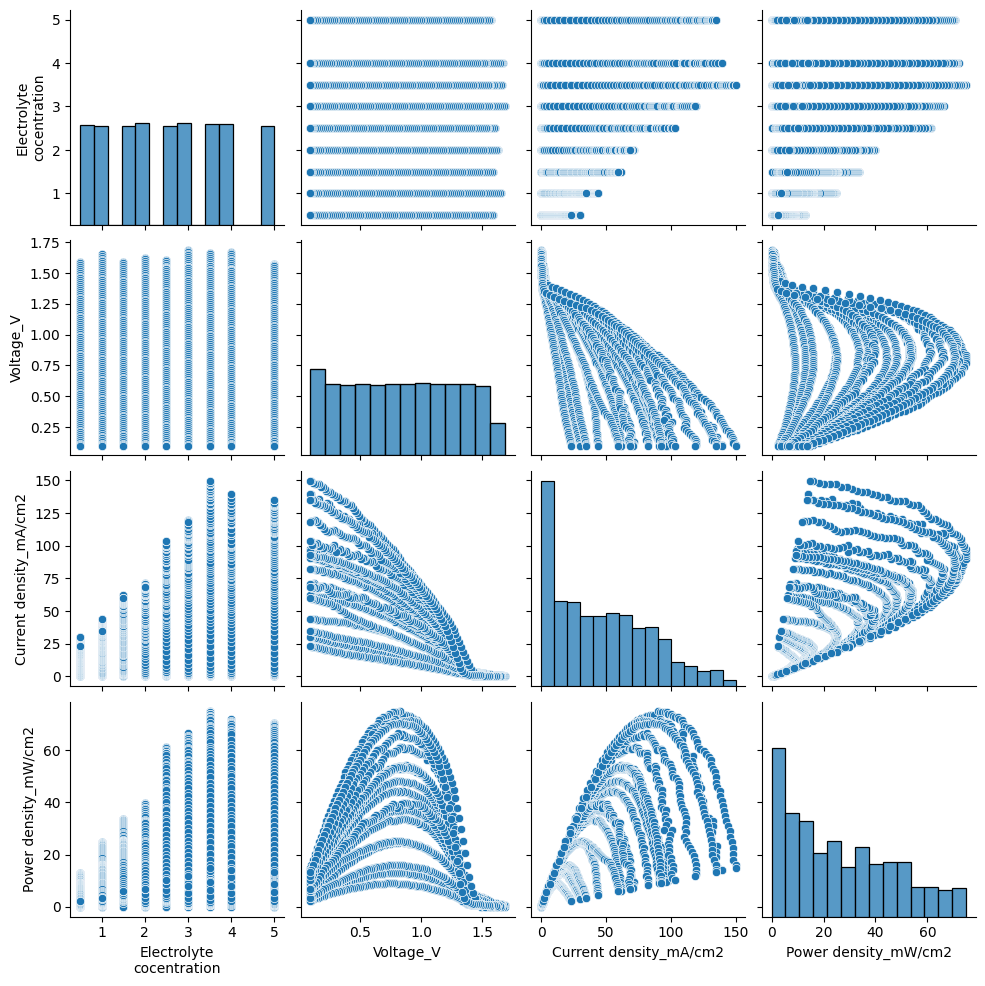

In [3]:

sns.pairplot(df)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Electrolyte               1798 non-null   object 
 1   Electrolyte
cocentration  1798 non-null   float64
 2   Voltage_V                 1798 non-null   float64
 3   Current density_mA/cm2    1798 non-null   float64
 4   Power density_mW/cm2      1798 non-null   float64
dtypes: float64(4), object(1)
memory usage: 70.4+ KB


In [5]:
df['Electrolyte'].nunique()

2

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Electrolyte               1798 non-null   object 
 1   Electrolyte
cocentration  1798 non-null   float64
 2   Voltage_V                 1798 non-null   float64
 3   Current density_mA/cm2    1798 non-null   float64
 4   Power density_mW/cm2      1798 non-null   float64
dtypes: float64(4), object(1)
memory usage: 70.4+ KB


# Encoding: Label Encoding

In [7]:
df['Electrolyte'].replace({'NaOH':0, 'KOH':1}, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Electrolyte               1798 non-null   int64  
 1   Electrolyte
cocentration  1798 non-null   float64
 2   Voltage_V                 1798 non-null   float64
 3   Current density_mA/cm2    1798 non-null   float64
 4   Power density_mW/cm2      1798 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 70.4 KB


# Outlier Detection

<Axes: >

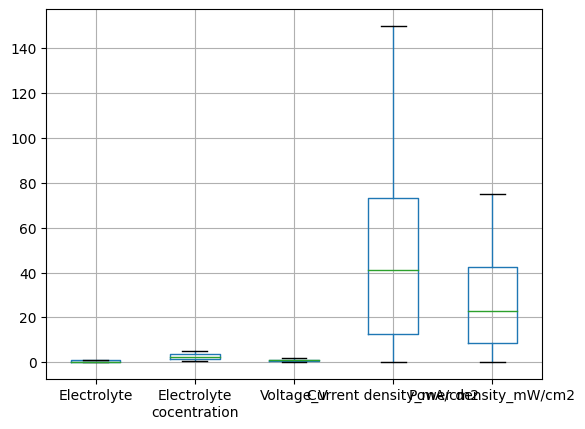

In [9]:
df.boxplot()

In [10]:
x= df.drop("Power density_mW/cm2", axis=1)
y=df['Power density_mW/cm2']

# Train and Test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

# Random Forest

In [12]:
RF_model = RandomForestRegressor()
RF_model.fit(x_train, y_train)

RandomForestRegressor()

In [13]:
y_pred_RF = RF_model.predict(x_test)
y_pred_RF

array([5.27249416e+01, 1.40808098e+01, 5.95892031e+01, 4.63868830e+01,
       1.96166099e+01, 3.21345805e+01, 2.07786183e+01, 4.44287254e+01,
       8.94215211e+00, 2.24468084e+01, 4.00951824e+01, 5.32841277e+01,
       1.31404775e+00, 2.31013079e+00, 3.88140526e+01, 1.16458484e+01,
       1.22585507e+01, 1.53530655e+01, 5.74813325e+01, 4.80218781e+00,
       4.62469152e+01, 3.61886854e+01, 6.22341411e+01, 1.49219089e+01,
       3.54136379e+01, 1.58592963e+01, 1.11236827e+01, 5.36210733e+01,
       4.66529371e+00, 2.40345387e+01, 4.29095344e+01, 5.42988000e+01,
       6.02396063e+00, 1.85747638e+01, 1.52015582e+01, 1.58765608e+01,
       6.94244051e+01, 3.68828682e+01, 3.25376317e+01, 5.07869273e+01,
       3.73480117e+01, 7.11404830e+01, 3.42489264e+00, 1.01900514e+01,
       7.06407256e+01, 1.22900283e+01, 1.91549385e+01, 2.30906938e+01,
       1.13528148e+01, 1.73363521e+01, 1.68878153e+01, 1.18503693e+01,
       1.33453037e+01, 1.55254471e+01, 4.74489333e+01, 1.94206238e+01,
      

In [14]:
MAE_RF = mean_absolute_error(y_test,y_pred_RF)
print("MAE for RF:",MAE_RF)
MSE_RF = mean_squared_error(y_test,y_pred_RF)
print("MSE for RF:",MSE_RF)
RMSE_RF = np.sqrt(MSE_RF)
print("RMSE for RF is:",RMSE_RF)
r_score_RF = r2_score(y_test,y_pred_RF)
print("R Score RF:",r_score_RF)

MAE for RF: 0.43090352963295797
MSE for RF: 0.5223952175098222
RMSE for RF is: 0.722769131541893
R Score RF: 0.9988595744766409


<function matplotlib.pyplot.show(close=None, block=None)>

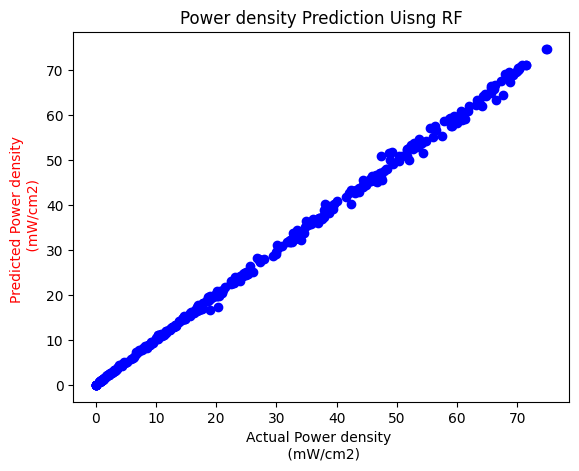

In [15]:
plt.scatter(y_test, y_pred_RF, color = 'blue')
plt.xlabel("Actual Power density \n (mW/cm2)", color = 'black')
plt.ylabel("Predicted Power density \n (mW/cm2)", color = 'Red')
plt.title('Power density Prediction Uisng RF')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

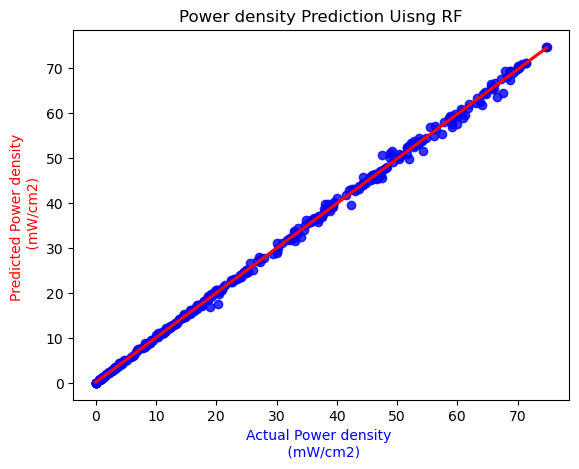

In [32]:
sns.regplot(x=y_test,y=y_pred_RF,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Actual Power density \n (mW/cm2)", color = 'blue')
plt.ylabel("Predicted Power density \n (mW/cm2)", color = 'Red')
plt.title('Power density Prediction Uisng RF')
plt.show

In [28]:
x_test.iloc[0]
pd.DataFrame({
    "Electrolyte"       :            [0.000000],
"Electrolyte cocentration"  :   [4.000000],
"Voltage_V"             : [0.758749],
"Current density_mA/cm2" :      [68.517075]
})

,Electrolyte,Electrolyte cocentration,Voltage_V,Current density_mA/cm2
0,0.0,4.0,0.758749,68.517075


In [30]:
RF_model.predict(pd.DataFrame({
    "Electrolyte": [0.000000],
    "Electrolyte\ncocentration": [4.000000],
    "Voltage_V": [0.758749],
    "Current density_mA/cm2": [68.517075]
}))

array([52.72494159])